<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#I did a hand calculation while writing this function. 
#Hopefully "functionizing" it should show that I understand the process.

def my_mvs(in_list):
  list_len = len(in_list)

  mean = sum(in_list)/list_len

  #list comprehension way to calculate variance:
  var = sum([((i-mean)**2/(list_len-1)) for i in in_list ])
  stdev = var**0.5

  #The non list comprehension way to do it:
  # my_sum = 0
  # for i in in_list:
  #   my_sum += ((i-mean)**2)/(list_len-1)
  #   print(i,my_sum)
  # var = my_sum
  
  return mean, var,stdev

sales = [3505,2400,3027,2798,3700,3250,2689]
sale_m,sale_v,sale_s = my_mvs(sales)
print(sale_m,sale_v,sale_s)

3052.714285714286 214387.90476190476 463.02041505953576


In [0]:
#Check to make sure I'm producing the right values:
print(np.mean(sales))
print(np.std(sales,ddof = 1))
np.var(sales,ddof=1)

3052.714285714286
463.0204150595357


214387.90476190473

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = np.array([127,80,105,92,120,115,93])
shop_data = pd.DataFrame({'sales':sales,'customers':customers})
shop_data.cov()
#It seems like the matrix produced here is a symmetric matrix
#Which makes sense because all covariance is asking is: what does variable b do 
#when variable a moves in direction 1.(+ = also moves in direction 1 - = moves
#in the opposite direction )

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cust_m ,cust_v,cust_s = my_mvs(customers)
print(sale_s)
cust_s

463.02041505953576


17.057326313123664

Here is the equation for correlation:
https://www.dummies.com/education/math/statistics/how-to-calculate-a-correlation/



In [0]:
#foru
int_calcs = []
for index,i in enumerate(customers):
  int_calcs.append((i-cust_m)*(sales[index]-sale_m))
penult_step = sum(int_calcs)/(sale_s*cust_s)
final = (penult_step)/(len(customers)-1)
print(final)

0.9628339778148908


In [0]:
#check with the library function:f
shop_data.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [0]:
#this is another way to do it that I should look into :

#np.corrcoeff


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic =pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
subset = titanic[['pclass','survived','age','sibsp','parch','ticket','fare','boat','body','has_cabin_number']]
subset.tail()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
1305,3.0,0.0,29.881135,1.0,0.0,2665,14.4542,NaN,NaN,0
1306,3.0,0.0,26.500000,0.0,0.0,2656,7.2250,NaN,304.0,0
1307,3.0,0.0,27.000000,0.0,0.0,2670,7.2250,NaN,NaN,0
1308,3.0,0.0,29.000000,0.0,0.0,315082,7.8750,NaN,NaN,0
1309,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
subset.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular

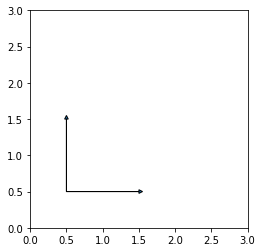

In [0]:
#parameters for graph
view = 0,3
origin = [0.5,0.5]
vector_1 = [0,1]
vector_2 = [1,0]
arw_sz = 0.05

#"initialize" the plot
fig, ax = plt.subplots()

#plot the vectors
ax.arrow(origin[0],origin[1],vector_1[0],vector_1[1],
         head_width=arw_sz,head_length=arw_sz);
ax.arrow(origin[0],origin[1],vector_2[0],vector_2[1],
         head_width=arw_sz,head_length=arw_sz);

#set view window properties         
ax.set_xlim(view)
ax.set_ylim(view)
ax.set_aspect('equal')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

-40


I wrote the below thinking about vectors from a more physical perspective. I forgot that the dot product = magnitude of vector in direction b * vector b . I'm not 100% sure what the physical intuition for this is. 

These vectors are not orthogonal because the dot product is nonzero.
I think of the dot product as asking the question: "How much of this vector a is going in the direct of vector b". Another way to think about this is: pretend vector b is the new x axis. What is the "x component" of vector a. The dot product is how you find out. If the dot product is 0 that means no component of vector a is going in the direction of vector b. (perpendicular)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])
c

array([  2, -15,   6,  20])

In [0]:
# square of the magnitude of the vector
#using numpy
print((np.linalg.norm(c))**2)
#my check
sum(c**2)

665.0


665

In [0]:
#dot product of c with itself (should just be magnitude)
np.dot(c,c)
#Okay its magnitude squared... I guess this is because you multiply 

665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7*\begin{bmatrix} 1\\0 \end{bmatrix}+12*\begin{bmatrix} 0\\1\end{bmatrix}
\end{align}
\begin{align}
e = 2*\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}
    + 11 \begin{bmatrix} 0\\1\\0 \end{bmatrix}
    - 8 \begin{bmatrix} 0\\0\\1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
mag_f = np.linalg.norm(f)

In [0]:
f = f/mag_f
f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

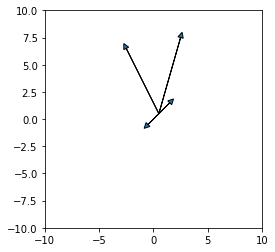

In [0]:
#parameters:
arw_sz= 0.5
#dependent
d_1 = [1,1]
d_2 = [-1,-1]
#independent
i_1 = [2,7]
i_2 = [-3,6] 

fig, ax = plt.subplots()

#dependent
ax.arrow(origin[0],origin[1],d_1[0],d_1[1],
         head_width=arw_sz,head_length=arw_sz);
ax.arrow(origin[0],origin[1],d_2[0],d_2[1],
         head_width=arw_sz,head_length=arw_sz);
#independent
ax.arrow(origin[0],origin[1],i_1[0],i_1[1],
         head_width=arw_sz,head_length=arw_sz);
ax.arrow(origin[0],origin[1],i_2[0],i_2[1],
         head_width=arw_sz,head_length=arw_sz);


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_aspect('equal')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#span is one because [4 8] = 4[1 2]

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# span is 3 as a linear scaling of the vectors does not produce any other vector

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



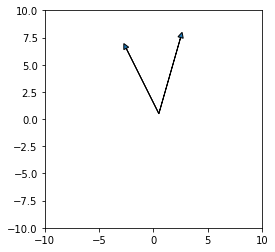

In [0]:
#this is really any two vectors that are independent
#parameters:
arw_sz= 0.5

#independent
i_1 = [2,7]
i_2 = [-3,6] 

fig, ax = plt.subplots()

#independent
ax.arrow(origin[0],origin[1],i_1[0],i_1[1],
         head_width=arw_sz,head_length=arw_sz);
ax.arrow(origin[0],origin[1],i_2[0],i_2[1],
         head_width=arw_sz,head_length=arw_sz);


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_aspect('equal')

## 6.2 What does it mean to form a basis?

You can reach any point on the xy plane with a linear combination of the vectors that form the basis. 

for higher dimensions replace xy plane with "n-dimensional surface"  or in other words "the set that contains all elements of the dimension you occupy". Line for 1d, plane for 2d and all of space for 3d.For the rest of the dimensions you can't really visualize, but the basis works in the same way. You should be able to reach any point in the fourth dimension with a 4d basis 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
row1 = np.array([1,2,3])
row2 = np.array([-1,0,7])
row3 = np.array([4,8,2])

row2  = row2 + row1
row2 = row2/2

row3 = row3-row1*4
row3 =row3/(-10)

In [0]:
print(row1,"\n",row2,"\n",row3)

[1 2 3] 
 [0. 1. 5.] 
 [-0. -0.  1.]


The rank of this matrix is 3

## 7.2 What does the rank of a matrix tell us?

Rank tells us the span of the vectors that the matrix represents

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# to get the projection we need to take the dot product of w and the unitized version of v
# lets unitize v
v = np.array([1,3])
v_mag = np.linalg.norm(v)
v_norm = v/v_mag
v_norm

array([0.31622777, 0.9486833 ])

In [0]:
#Now dot product of v and w
w = np.array([-1,2])
proj_scale = np.dot(v_norm,w)
#The calculated value is the magnitude in the direction of v_norm

In [0]:
#Here is the actual projection:
projl_w= v_norm*proj_scale
projl_w

array([0.5, 1.5])

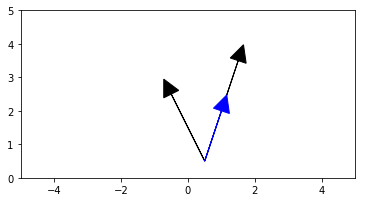

In [0]:
#parameters:
arw_sz= 0.5

#independent
i_1 = [1,3]
i_2 = [-1,2] 


fig, ax = plt.subplots()

#independent
ax.arrow(origin[0],origin[1],i_1[0],i_1[1],
         head_width=arw_sz,head_length=arw_sz,
         color='black');
ax.arrow(origin[0],origin[1],i_2[0],i_2[1],
         head_width=arw_sz,head_length=arw_sz,
         color = 'black');
ax.arrow(origin[0],origin[1],projl_w[0],projl_w[1],
         head_width=arw_sz,head_length=arw_sz,
         color = 'blue')

ax.set_xlim(-5,5)
ax.set_ylim(0,5)
ax.set_aspect('equal')

Some of the functionalities that would be nice here would be:
* Turn a vector into a dashed line
* Plot the components of a vector
* More visual indication shown on the graph for the projection 



# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


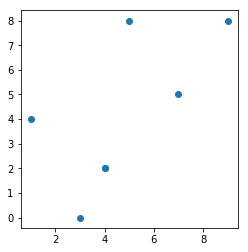

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

# y = x
x_to = [0,1,2,3,4,5,6,7]f
y_to = x_to

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.axes().set_aspect('equal')
plt.show()
